<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/hingeloss_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_pdf import PdfPages
np.random.seed(22)
C=100
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N) # each row is a data point 
X1 = np.random.multivariate_normal(means[1], cov, N)
b=np.ones((1, N))
X0_bar=np.vstack((X0.T,b))
X1_bar=np.vstack((X1.T,b))
Z=np.hstack((X0_bar,-X1_bar))
Z.shape

In [77]:
def cost(w):
    u = w.T.dot(Z) # as in (23)
    return (np.sum(np.maximum(0, 1 - u)) + \
            .5*lam*np.sum(w*w)) - .5*lam*w[-1]*w[-1]

In [85]:
def grad(w):
    u = w.T.dot(Z) # as in (23)
    H = np.where(u < 1)[1]
    ZS = Z[:, H]
    g = (-np.sum(ZS, axis = 1, keepdims = True) + lam*w)
    g[-1] -= lam*w[-1]
    return g
def grad_descent(w0, eta):
    w = w0
    it = 0 
    while it < 100000:
        it = it + 1
        g = grad(w)
        w -= eta*g
        # if (it % 10000) == 1:
        #     print('iter %d' %it + ' cost: %f' %cost(w))
        if np.linalg.norm(g) < 1e-5:
            break 
    return w 

In [82]:
w0=np.random.randn(X0_bar.shape[0], 1)
w=grad_descent(w0,0.001)
w_hinge = w[:-1].reshape(-1, 1)
b_hinge = w[-1]
print(w_hinge,
b_hinge)

iter 1 cost: 84.182050
iter 10001 cost: 15.749962
iter 20001 cost: 15.740109
iter 30001 cost: 15.717331
iter 40001 cost: 15.707406
iter 50001 cost: 15.695452
iter 60001 cost: 15.679772
iter 70001 cost: 15.663624
iter 80001 cost: 15.672327
iter 90001 cost: 15.663578
[[-1.86291484]
 [-1.79540782]] [8.45011829]


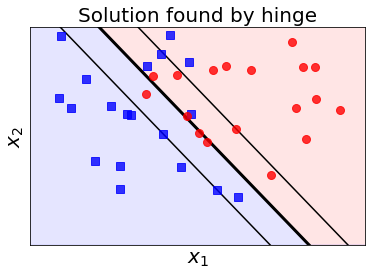

In [83]:
def myplot(X0, X1, w, b, filename, tit):
    with PdfPages(filename) as pdf:
        fig, ax = plt.subplots()

        w0 = w[0]
        w1 = w[1]
        x1 = np.arange(-10, 10, 0.1)
        y1 = -w0/w1*x1 - b/w1
        y2 = -w0/w1*x1 - (b-1)/w1
        y3 = -w0/w1*x1 - (b+1)/w1
        plt.plot(x1, y1, 'k', linewidth = 3)
        plt.plot(x1, y2, 'k')
        plt.plot(x1, y3, 'k')

        # equal axis and lim
        plt.axis('equal')
        plt.ylim(0, 3)
        plt.xlim(2, 4)

        # hide tikcs 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        # fill two regions
        y4 = 10*x1
        plt.plot(x1, y1, 'k')
        plt.fill_between(x1, y1, color='blue', alpha=0.1)
        plt.fill_between(x1, y1, y4, color = 'red', alpha = 0.1)

        plt.xlabel('$x_1$', fontsize = 20)
        plt.ylabel('$x_2$', fontsize = 20)
        plt.title('Solution found by ' + tit, fontsize = 20)

        plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
        plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
        pdf.savefig()
        plt.show()

myplot(X0, X1, w_hinge, b_hinge, 'svm_hinge.pdf', 'hinge')

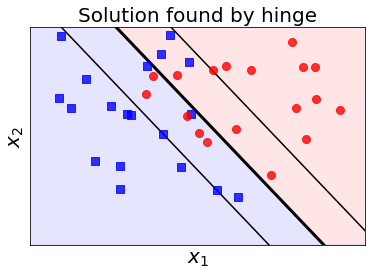

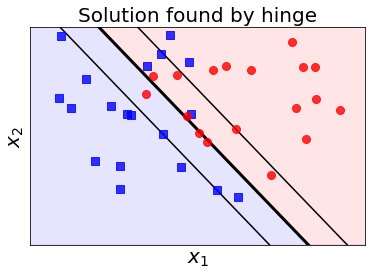

In [88]:
for C in [10,500]:
  lam=1./C
  w=grad_descent(w0,0.001)
  w_hinge = w[:-1].reshape(-1, 1)
  b_hinge = w[-1]
  myplot(X0, X1, w_hinge, b_hinge, 'svm_hinge.pdf', 'hinge')